1.
(a)The mean = 29.96
The median = 25
(b) The min-max normalization age(35) = 0.38596

c)


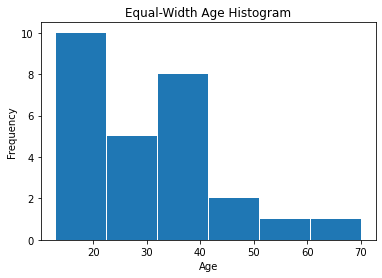

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean, median
# 1. (a) (10 points) What is the mean of the data? What is the median?
# list of the given numbers
num_list = [13, 45, 22, 25, 46, 21, 15, 16, 25, 52, 16, 35, 70, 
            35, 25, 36, 19, 20, 22, 25, 30, 33, 33, 20, 35, 35, 40]
print(f"1.\n(a)The mean = {round(mean(num_list), 2)}")
print(f"The median = {median(num_list)}")

# (b) (15 points) Use min-max normalization (scaling) to transform the value 35 for age onto the range
# [0.0, 1.0].
# Perform min-max normalization
min_val = min(num_list)
max_val = max(num_list)
age = 35
scaled_age = (age - min_val) / (max_val - min_val)

# Print the scaled value
print(f"(b) The min-max normalization age(35) = {round(scaled_age, 5)}\n\nc)")

# (c) (15 points) Plot an equal-width histogram of width 10.
# Define the bin width
bin_width = 10

# Calculate the number of bins based on the bin width
num_bins = int((max(num_list) - min(num_list)) / bin_width) + 1
# Plot the histogram
plt.hist(num_list, bins=num_bins, rwidth=0.981, range=(min(num_list), max(num_list)))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Equal-Width Age Histogram')
plt.show()

In [53]:
# 2. 
prices = [15, 204, 13, 5, 50, 215, 72, 10, 11, 35, 55, 92]
num_bins = 3
width = (max(prices) - min(prices))//num_bins
print("2. \n~ (15 points) equal interval width (also called equal-width partitioning)")
print(f"The width is = {width}")

#range of each bin = (min + i*width) where "i" is the ith bin
bin_range = []
for i in range(1, num_bins+1):
    x = min(prices) + i * width
    bin_range.append(x)
print(f"The Bin ranges are: {bin_range}")

bin_1, bin_2, bin_3 = [], [], []
for i in range(len(prices)):
    cost = prices[i]
    if cost < 75:
        bin_1.append(cost)
    elif cost in range(75, 145+1):
        bin_2.append(cost)
    else:
        bin_3.append(cost)

print(f"Bin 1 = {bin_1}")
print(f"Bin 2 = {bin_2}")
print(f"Bin 3 = {bin_3}\n")

print("~ (15 points) Equal frequency intervals (also called equal-frequency partitioning)")
binning_range = len(prices)//num_bins
prices.sort()
print(prices)

# slicing the prices list 
bin_1 = prices[:binning_range]
bin_2 = prices[binning_range:2*binning_range]
bin_3 = prices[2*binning_range:]

# Print the sub-lists
print(f"Bin 1: {bin_1}")
print(f"Bin 2: {bin_2}")
print(f"Bin 3: {bin_3}")


2. 
~ (15 points) equal interval width (also called equal-width partitioning)
The width is = 70
The Bin ranges are: [75, 145, 215]
Bin 1 = [15, 13, 5, 50, 72, 10, 11, 35, 55]
Bin 2 = [92]
Bin 3 = [204, 215]

~ (15 points) Equal frequency intervals (also called equal-frequency partitioning)
[5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]
Bin 1: [5, 10, 11, 13]
Bin 2: [15, 35, 50, 55]
Bin 3: [72, 92, 204, 215]


In [49]:
import math
# this calcultes the frequency of word "x" in document "d" 
# f = (how many times it appears/ lenght of the document)
def term_frequency(document, word):
    return document.count(word) / len(document)
# idf = log2(N/|{dED: tEd}|)
def inverse_document_frequency(doc_freqs, word, total_documents):
    documents_with_word = doc_freqs[word]
    return math.log2(total_documents / documents_with_word)

# tfidf = tf * idf
def tfidf(document, doc_freqs, total_documents):
    unique_words = set(document)
    tfidf = {}
    
    for word in unique_words:
        tf = term_frequency(document, word)
        idf = inverse_document_frequency(doc_freqs, word, total_documents)
        tfidf[word] = tf * idf
        
    return tfidf
doc_freqs = {
    "machine": 32,
    "learning": 16,
    "software": 8,
    "computer": 64,
    "robust": 1024
}
print("3.")
print("The TF-IDF weighted term vector for document D.\n")
# N
total_documents = 1024
# d
document_d = "machine learning software robust computer software".split()
tfidf_vector = tfidf(document_d, doc_freqs, total_documents)
for word, tfidf_value in tfidf_vector.items():
    print(f"{word}: {tfidf_value:.4f}")


3.
The TF-IDF weighted term vector for document D.

learning: 1.0000
machine: 0.8333
robust: 0.0000
software: 2.3333
computer: 0.6667
